In [9]:
import numpy as np
import xarray as xr
import sys
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_tools/lkf_tools/')
from dataset import *
sys.path.insert(1, '/p/project/chhb19/gaertner2/lkf_detection/functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20})
import cartopy.crs as ccrs
import cmocean
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '/p/project/chhb19/gaertner2/data/awicm_cvmix/'
path_ds = path + 'datasets/'
path_nc = '/p/scratch/chhb19/gaertner2/interpolated_fesom_output/1km/'

In [6]:
# get the arctic basin (same for all years, the dataset loaded
# here does not matter)
lkf_data = np.load(path_ds + f'ds_2093.npy', allow_pickle=True)[0]
z = 70
a = max([0,lkf_data.index_y[0][0]-1])
b = lkf_data.index_y[0][-1]+2
c = max([0,lkf_data.index_x[0][0]-1])
d = lkf_data.index_x[0][-1]+2 - z
e = lkf_data.red_fac

lon = lkf_data.lon[a:b:e,c:d:e]
lat = lkf_data.lat[a:b:e,c:d:e]

In [7]:
year = 2095

In [8]:
file = xr.open_dataset(path_nc + f'1km_{year}.nc')

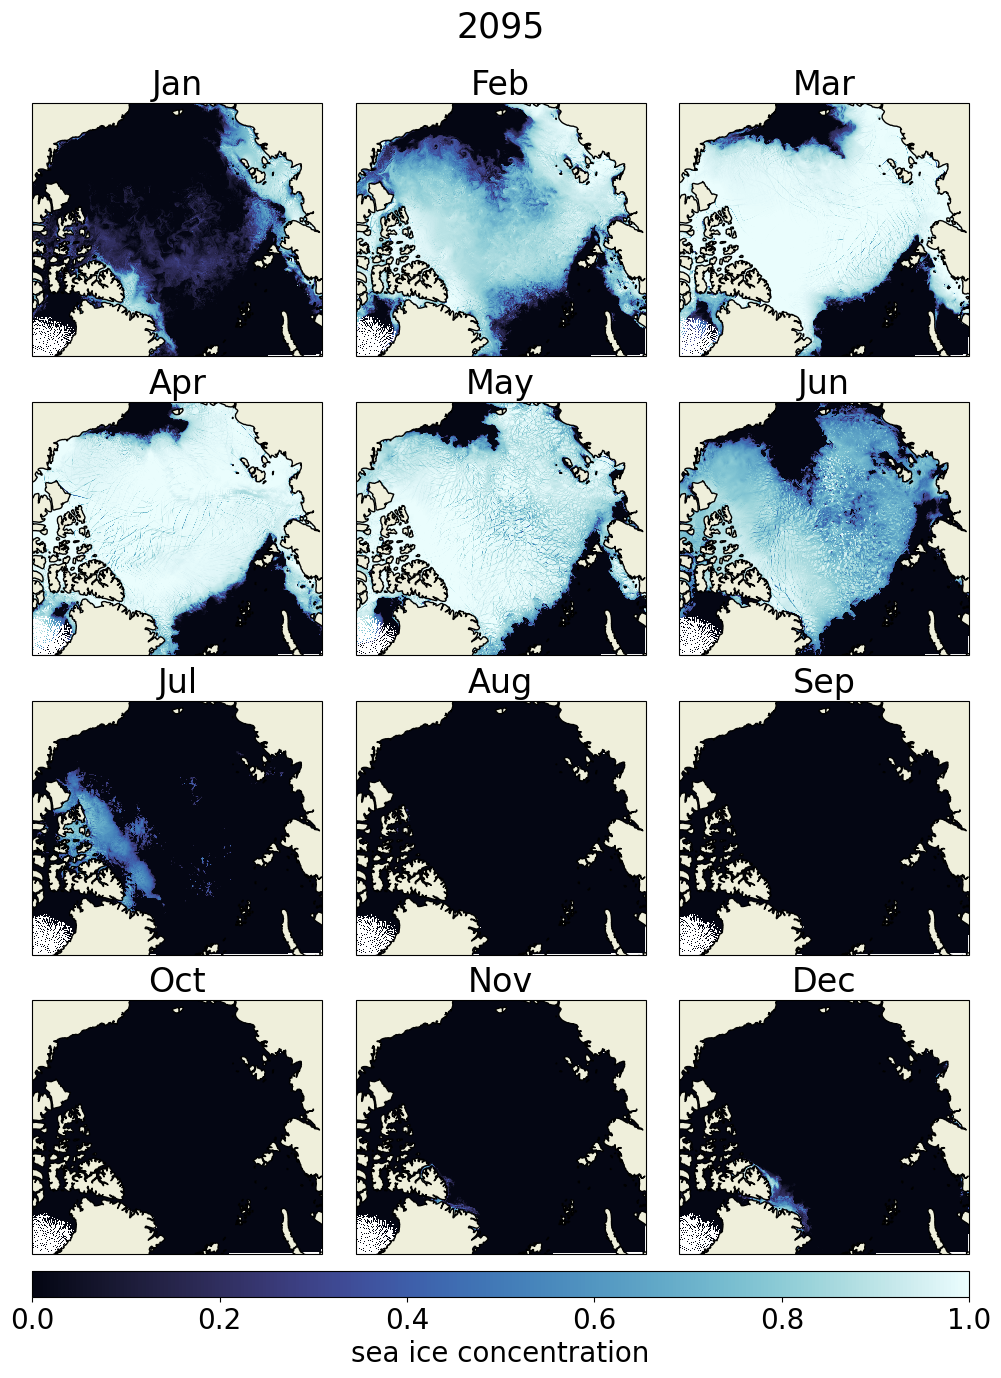

In [14]:
days = np.append([0], xticks)

fig = plt.figure(figsize=[10, 13])
axs = [fig.add_subplot(4,3,i, projection=ccrs.Orthographic(0, 90)) for i in range(1,13)]

for ax, day, title in zip(axs, days, xticks_labels):

    ax.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='black')
    im = ax.pcolormesh(lon, lat, file.A.isel(time=day)[a:b,c:d],
                       cmap = cmocean.cm.ice, vmin=0, vmax=1,
                       transform=ccrs.PlateCarree())
    
    ax.set_title(title)

fig.suptitle(f'{year}', fontsize=25)
fig.tight_layout()

p0 = axs[-3].get_position().get_points().flatten()
p1 = axs[-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], -0.01, p1[2]-p0[0], 0.02])
cbar = plt.colorbar(im,label='sea ice concentration', cax=ax_cbar, orientation='horizontal')
#plt.savefig(path+f'imgs/ice_{year}.png', dpi=100, bbox_inches='tight')